# 1. Проблема

![task1](task1.png)

# 2. Содержательная постановка

Необходимо посчитать сопротивление, при котором обеспечивается совпадение экспериментальных результатов с теоретическими по модели закона Ома.

# 3. Формальная постановка

Пусть 

- $X = \{X_1,X_2,\dots,X_n\}$ - пространство зафиксированных (подаваемых) значений (напряжение на участке цепи).

- $y = \{y_1,y_2,\dots,y_n\} $ - простраство случайных (измеренных) значений (сила тока в участке цепи).

- $w = \dfrac{1}{R}$ - коэффициент пропорциональности (проводимость)

Задача:

$$
\textrm{MSE} \rightarrow \min
$$

Условия:

$$
U_n > 0\\
I_n > 0\\
w > 0
$$


# 4. Алгоритм и ПО

Мы предполагаем, что согласно закону Ома для участка цепи ($I = \frac{U}{R}$) истинная связь между $U$ и $I$ является линейной, плюс некоторая случайная ошибка:

$$
y_i = f(w,X_i)+\varepsilon_i
$$

В данном случае в качестве веса будет выступать проводимость $\dfrac{1}{R}$.

Проверку состоятельности модели закона Ома будем проводить рассчитывая коэффициент детерминации $\mathbf{R}^2$. 

Если $\mathbf{R}^2$ выше $50$%, то модель будем считать приемлемой.

Если $\mathbf{R}^2$ выше $80$%, то модель будем считать хорошей.

В качестве алгоритма будем использовать МНК. Выбор обусловлен тем, что МНК в случае нормального распределения ошибки эксперимента обеспечивает максимальную вероятность повторения результатов опыта на модели.

В качестве ПО будем использовать ЯП python, с подключенными модулями:

- numpy - для работы с линейной алгеброй

- sklearn - для линейной регрессии

- seaborn - для построения графиков

# 5. Решение задачи

Приведем решение задачи с применением выбранного алгоритма.

Функция, оценивающая качество модели:

In [7]:
def is_ok(R, R_acceptable=0.5, R_good=0.8):
    '''
    Хорошая ли модель
    
    Функция оценивает качество модели
    
    R - значение коэффициента детерминации,
    на основе которого принимается решение
    
    R_acceptable - нижний порог
    (ниже - модель непримемлема)
    
    R_good - верхний порог
    (выше - модель хорошая)
    '''
    
    if R >= R_good:
        print('Модель хорошая. Закон Ома выполняется')
    elif R >= R_acceptable:
        print('Модель приемлемая. Закон Ома выполняется')
    else:
        print('Модель непримемлемая. Закон Ома не выполняется')

Вызываемая функция:

In [8]:
def get_r_sq(y, X, not_from_zero=False):
    '''
    Получить коэффициент детерминации
    
    Функция возвращает значение
    коэффициента детерминации,
    проводимости, сопротивления.
    Также строит график и оценивает
    качество модели.
    В качестве модели исользуется
    линейная регрессия МНК.
    
    y - список значений 
    фиксированного параметра
    (напряжение)
    
    X - список значений 
    измеренного параметра
    (сила тока)
    
    not_from_zero - булева переменная,
    из нуля ли идет график
    (по умолчанию - да)
    '''
    
    import numpy as np
    from sklearn.linear_model import LinearRegression
    import seaborn as sns
    from matplotlib.pyplot import show
    
    X = np.array(X)
    y = np.array(y).reshape((-1, 1))

    model = LinearRegression(fit_intercept = not_from_zero).fit(y, X)

    R = model.score(y, X)
    w = model.coef_

    print('Коэффициент детерминации:', R)
    print('Проводимость:', w[0])
    print('Сопротивление:', 1/w[0])
    
    if not_from_zero:
        print('Отступ:', model.intercept_)
    
    sns.regplot(x=X, y=y)
    show()
    
    return is_ok(R)

# 6. Анализ

Проведем анализ результатов:

Сгенерируем данные:

In [17]:
import numpy as np
import random

U = [0, 5, 15, 25, 35, 45, 55] # В

R = 222 # Ом

I = [u/R + random.uniform(-0.01,0.01) for u in U]

Применим к данным нашу модель и получим анализ результатов

Коэффициент детерминации: 0.9937503992318009
Проводимость: 0.004496568730103942
Сопротивление: 222.39179695066824


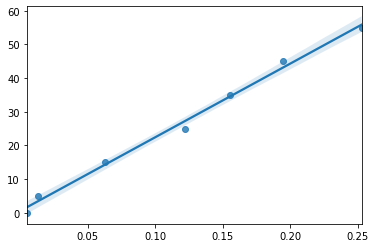

Модель хорошая. Закон Ома выполняется


In [18]:
get_r_sq(U, I)

Сопротивления совпадают.